In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json

In [2]:
save = True
colors = mpl.colormaps['Set3'].colors

incidents

In [4]:
incidents = pd.read_csv('data/incidents.csv')

developer_counts = dict()
deployer_counts = dict()
harmed_counts = dict()
year_counts = dict()

for i in range(len(incidents)):
    developers = json.loads(incidents.loc[i, 'Alleged developer of AI system'])
    deployers = json.loads(incidents.loc[i, 'Alleged deployer of AI system'])
    harmed = json.loads(incidents.loc[i, 'Alleged harmed or nearly harmed parties'])
    year = int(incidents.loc[i, 'date'][:4])
    if year < 2024:
        if year in year_counts.keys():
            year_counts[year] += 1
        else:
            year_counts[year] = 1
    for developer in developers:
        if developer in developer_counts.keys():
            developer_counts[developer] += 1
        else:
            developer_counts[developer] = 1
    for deployer in deployers:
        if deployer in deployer_counts.keys():
            deployer_counts[deployer] += 1
        else:
            deployer_counts[deployer] = 1
    for harm in harmed:
        if harm in harmed_counts.keys():
            harmed_counts[harm] += 1
        else:
            harmed_counts[harm] = 1
    

sorted_developer_counts = dict(sorted(developer_counts.items(), key=lambda item: item[1]))
sorted_deployer_counts = dict(sorted(deployer_counts.items(), key=lambda item: item[1]))
sorted_harmed_counts = dict(sorted(harmed_counts.items(), key=lambda item: item[1]))
sorted_year_counts = dict(sorted(year_counts.items(), key=lambda item: item[0]))

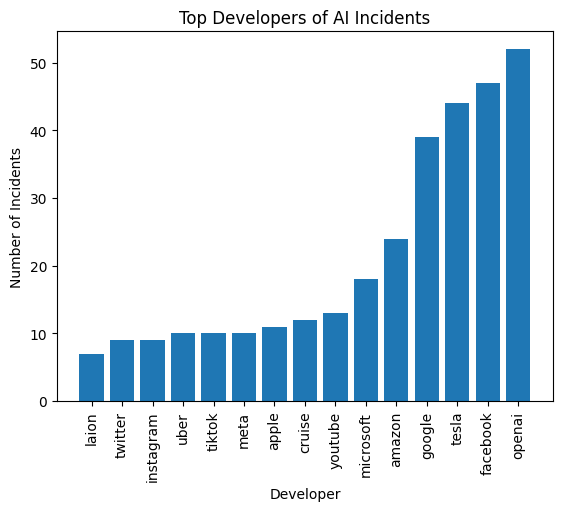

In [5]:
plt.bar(list(sorted_developer_counts.keys())[-16:-1], list(sorted_developer_counts.values())[-16:-1])
plt.xlabel('Developer')
plt.ylabel('Number of Incidents')
plt.title('Top Developers of AI Incidents')
plt.xticks(rotation='vertical')
if save:
    plt.savefig('visuals/top_developers.png', bbox_inches='tight')
else:
    plt.show()

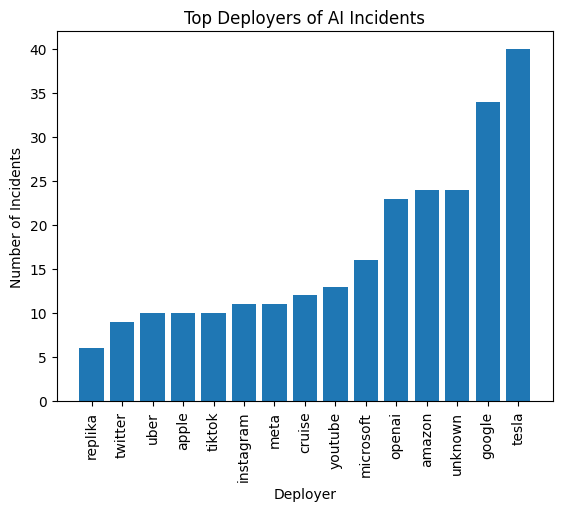

In [6]:
plt.bar(list(sorted_deployer_counts.keys())[-16:-1], list(sorted_deployer_counts.values())[-16:-1])
plt.xlabel('Deployer')
plt.ylabel('Number of Incidents')
plt.title('Top Deployers of AI Incidents')
plt.xticks(rotation='vertical')
if save:
    plt.savefig('visuals/top_deployers.png', bbox_inches='tight')
else:
    plt.show()

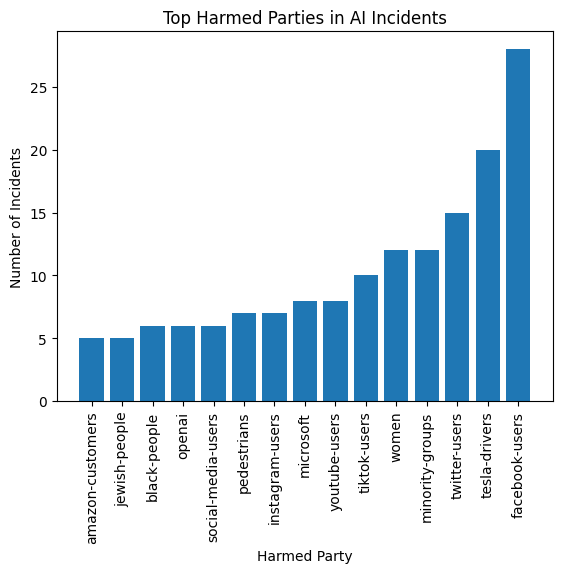

In [7]:
plt.bar(list(sorted_harmed_counts.keys())[-16:-1], list(sorted_harmed_counts.values())[-16:-1])
plt.xlabel('Harmed Party')
plt.ylabel('Number of Incidents')
plt.title('Top Harmed Parties in AI Incidents')
plt.xticks(rotation='vertical')
if save:
    plt.savefig('visuals/top_harmed.png', bbox_inches='tight')
else:
    plt.show()

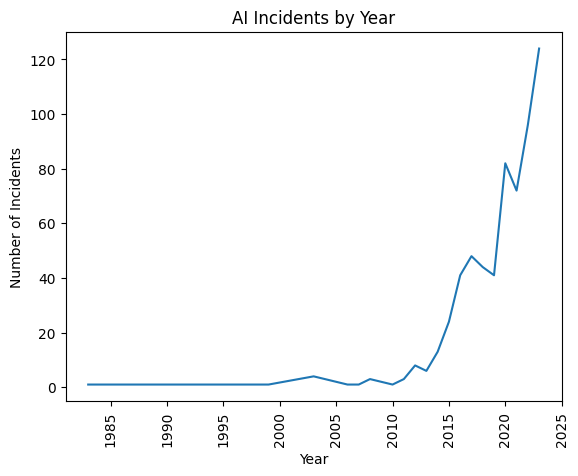

In [8]:
plt.plot(list(sorted_year_counts.keys()), list(sorted_year_counts.values()))
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('AI Incidents by Year')
plt.xticks(rotation='vertical')
if save:
    plt.savefig('visuals/incidents_by_year.png', bbox_inches='tight')
else:
    plt.show()

NeurIPS

In [9]:
neurips = pd.read_pickle('data/nips.pkl')

In [10]:
categories = ['Algorithms', 'Applications', 'Data, Challenges, Implementations, and Software', 'Deep Learning', 'Neuroscience and Cognitive Science', 'Optimization', 'Probabilistic Methods', 'Reinforcement Learning and Planning', 'Theory', 'Safety and Alignment', 'Other']
category_colors = dict(zip(categories, colors))

years = [i for i in range(1987, 2024)]
counts = [0 for i in range(1987, 2024)]
category_counts = {
    'Algorithms': [0 for i in range(1987, 2024)],
    'Applications': [0 for i in range(1987, 2024)],
    'Data, Challenges, Implementations, and Software': [0 for i in range(1987, 2024)],
    'Deep Learning': [0 for i in range(1987, 2024)],
    'Safety and Alignment': [0 for i in range(1987, 2024)],
    'Neuroscience and Cognitive Science': [0 for i in range(1987, 2024)],
    'Optimization': [0 for i in range(1987, 2024)],
    'Probabilistic Methods': [0 for i in range(1987, 2024)],
    'Reinforcement Learning and Planning': [0 for i in range(1987, 2024)],
    'Theory': [0 for i in range(1987, 2024)],
    'Other': [0 for i in range(1987, 2024)]
}
errors = []

for i in range(len(neurips)):
    year = neurips.iloc[i]['year']
    if year < 2024:
        counts[year-1987] += 1
        category = neurips.iloc[i]['category']
        if category in categories:
            category_counts[category][year-1987] += 1
        else:
            errors.append(i)


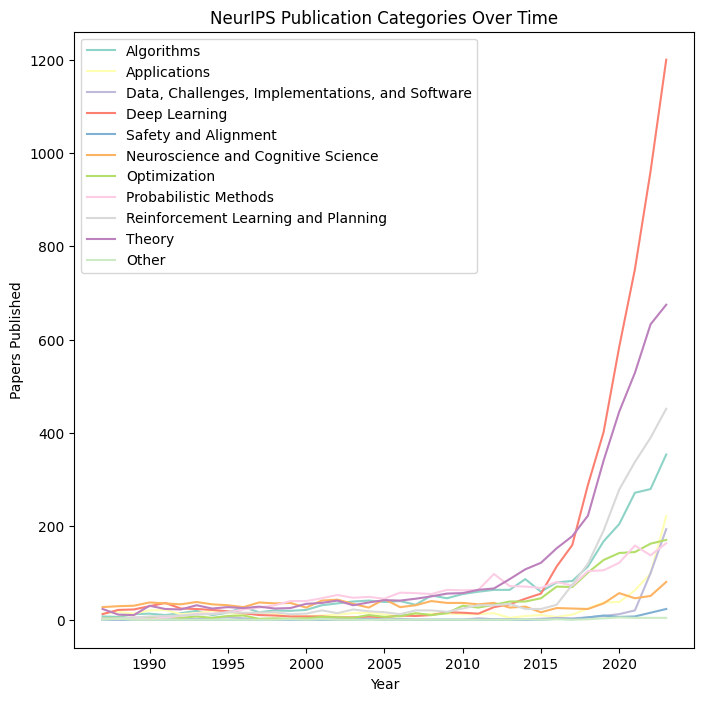

In [11]:
plt.figure(figsize=(8, 8))
idx = 0

for category, category_count in category_counts.items():
    plt.plot(years, category_count, label=category, color=colors[idx])
    idx += 1

# plt.plot(years, counts, label='Total')
plt.xlabel('Year')
plt.ylabel('Papers Published')
plt.title('NeurIPS Publication Categories Over Time')
plt.legend()
if save:
    plt.savefig('visuals/nips_category_line.png', bbox_inches='tight')
else:
    plt.show()

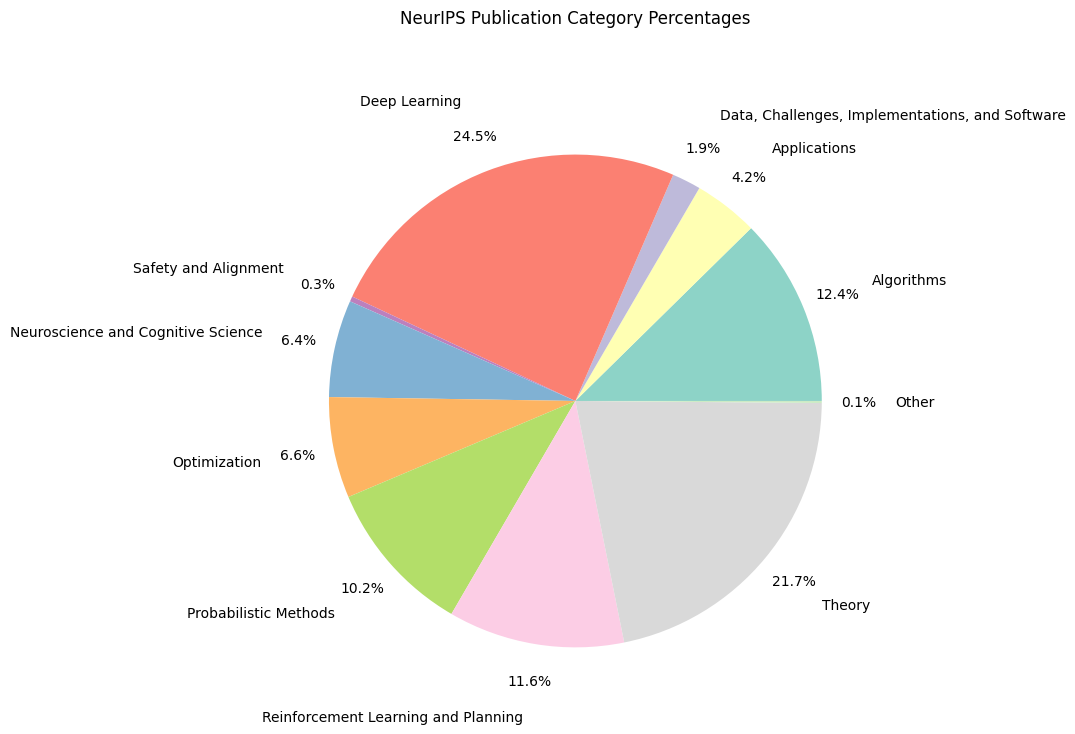

In [12]:
pie_labels = []
pie_sizes = []
pie_colors = []
pie_explode = []

idx = 0
for category, category_count in category_counts.items():
    pie_labels.append(category)
    pie_sizes.append(sum(category_count))
    pie_colors.append(category_colors[category])
    pie_explode.append(0)

    idx += 1


plt.figure(figsize=(8, 8))
plt.pie(pie_sizes, labels=pie_labels, colors=pie_colors, explode=pie_explode, autopct='%1.1f%%', labeldistance=1.3, pctdistance=1.15)
plt.title('NeurIPS Publication Category Percentages', y=1.1)
if save:
    plt.savefig('visuals/nips_category_pie.png', bbox_inches='tight')
else:
    plt.show()

NeurIPS Safety

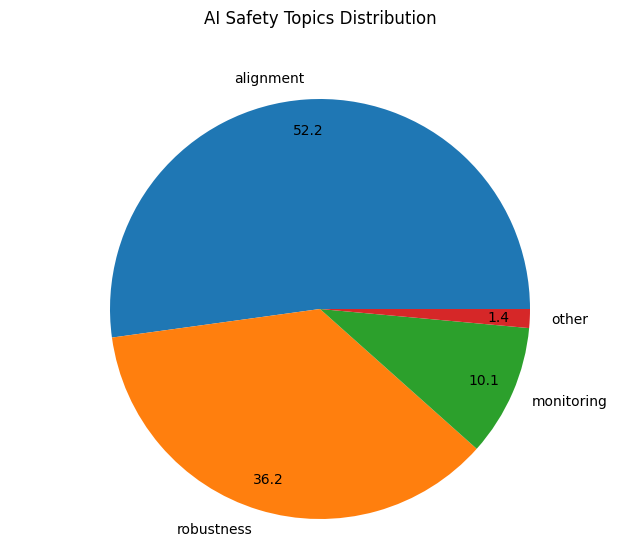

In [13]:
# safety papers by safety topics
safety_categories_3 = pd.read_pickle('data/safety_categories.pkl')
safety_category_counts_3 = safety_categories_3['topics'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(safety_category_counts_3, labels=safety_category_counts_3.index, autopct='%1.1f', labeldistance=1.1, pctdistance=0.85)
plt.title('AI Safety Topics Distribution', y=1.1)
plt.axis('equal')
if save:
    plt.savefig('visuals/safety_papers_by_safety_topics.png')
else:
    plt.show()

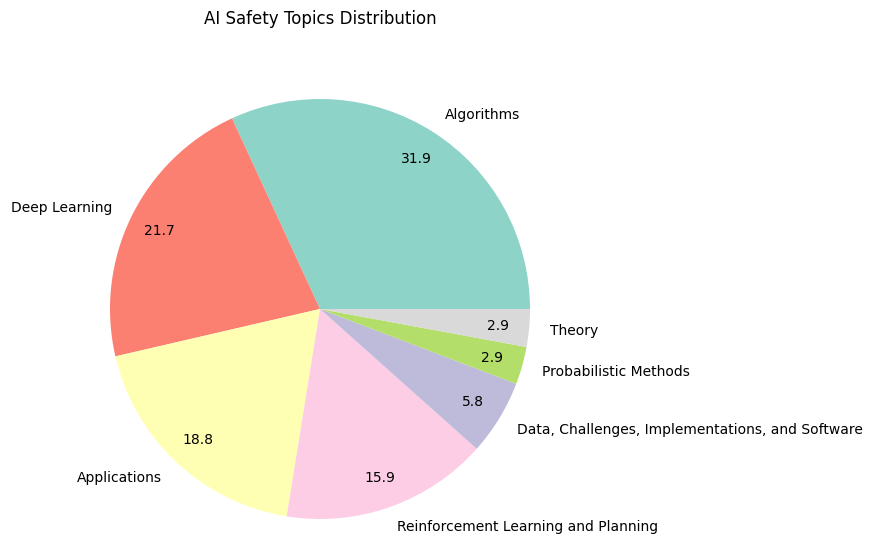

In [14]:
# safety papers by neurips categories
safety_categories = pd.read_pickle('data/safety_nips_categories.pkl')
safety_category_counts = safety_categories['topics'].value_counts()
match_colors = [category_colors[c] for c in safety_category_counts.index]

labels = safety_category_counts.index

plt.figure(figsize=(8, 6))
plt.pie(safety_category_counts, labels=safety_category_counts.index, colors=match_colors, autopct='%1.1f', labeldistance=1.1, pctdistance=0.85)
plt.title('AI Safety Topics Distribution', y=1.1)
plt.axis('equal')
if save:
    plt.savefig('visuals/safety_papers_by_neurips_topics.png')
else:
    plt.show()

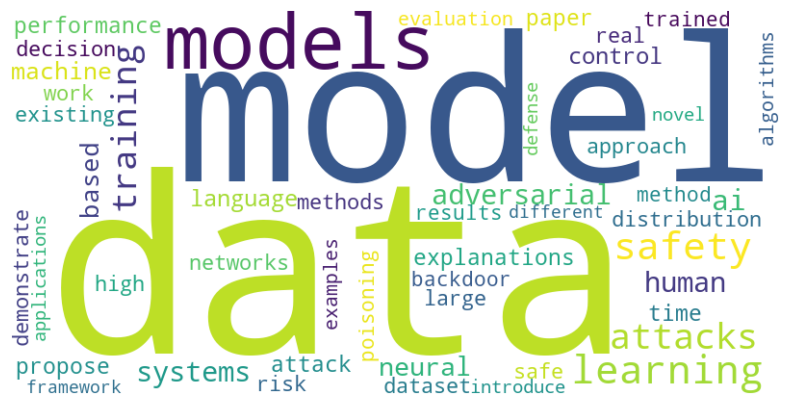

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

safety_paper_strings = safety_categories['title'] + ' ' + safety_categories['abstract']
vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(safety_paper_strings)
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(bag_of_words_df.sum())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
if save:
    plt.savefig('visuals/safety_wordcloud.png', bbox_inches='tight')
else:
    plt.show()

combined graphs

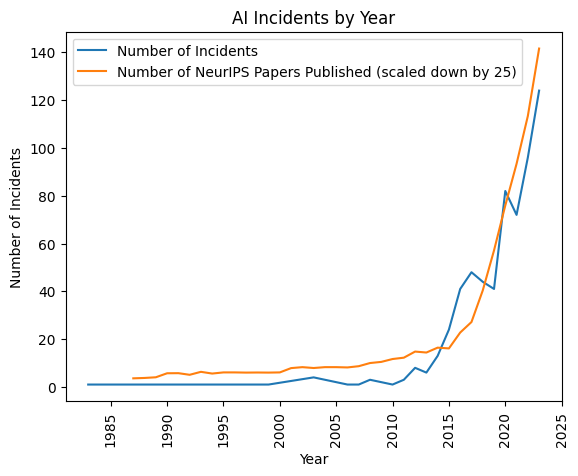

In [16]:
plt.plot(list(sorted_year_counts.keys()), list(sorted_year_counts.values()), label='Number of Incidents')
plt.plot(years, [x / 25 for x in counts], label='Number of NeurIPS Papers Published (scaled down by 25)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.title('AI Incidents by Year')
plt.xticks(rotation='vertical')
if save:
    plt.savefig('visuals/incidents_by_year.png', bbox_inches='tight')
else:
    plt.show()